hi lets game!
| | | | |
|3| | | |
|3| | | |
| | | | |

heyho were you gun gos
| | | | |
| |3| | |
| | | | |
|6| | | |

heyho were you gun gos
| | | | |
| | | | |
| | |6| |
|6|3| | |

heyho were you gun goa
| | |3| |
| | | | |
|6| | | |
|6|3| | |

heyho were you gun gos
|  |  |  |  |
|  |  |  |  |
|  |  |  |  |
|12| 3| 3| 3|

heyho were you gun goa
| 6|  |  |  |
|  |  |  |  |
|  |  |  |  |
|12| 6| 3|  |

heyho were you gun gos
|  |  |  |  |
|  |  | 6|  |
| 6|  |  |  |
|12| 6| 3|  |

heyho were you gun goa
| 3|  |  |  |
| 6|  |  |  |
| 6|  |  |  |
|12| 6| 3|  |

heyho were you gun gos
|  |  |  | 6|
| 3|  |  |  |
|12|  |  |  |
|12| 6| 3|  |

heyho were you gun gos
|  |  |  | 3|
|  |  |  |  |
| 3|  |  |  |
|24| 6| 3| 6|

heyho were you gun goa
| 3| 6|  |  |
|  |  |  |  |
| 3|  |  |  |
|24| 6| 3| 6|

heyho were you gun gos
|  |  |  |  |
|  |  |  |  |
| 6|  |  | 3|
|24|12| 3| 6|

heyho were you gun goss
bbbeeezzzrt!!
heyho were you gun goa
|  |  |  |  |
|  |  |  | 3|
| 6| 3|  |  |
|24|12| 3|

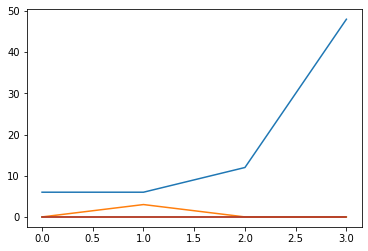

In [11]:
import random
import copy
import numpy as np
import matplotlib.pyplot as plt

#set up board
# board = [[0,0,2,0],[2,0,2,4],[2,4,0,4],[0,0,0,0]]
boardSize = 4
#display fuction
def display():
  largest = board[0][0]
  for row in board:
    for element in row:
      if element > largest:
        largest = element

  numSpaces = len(str(largest))      
  for row in board:
    currRow = "|"
    for element in row:
      if element == 0:
        currRow += " " * numSpaces + "|"
      else:
        currRow += (" " * (numSpaces - len(str(element)))) + str(element) + "|" 
    print(currRow)
  print()
#display()

#move fuctions
def merge1rowL(row):
  #move everything left in a single row[1]
  for j in range(boardSize - 1):
    for i in range(boardSize - 1, 0, -1):
      # check for empty space to the left
      if row[i - 1] == 0:
        row[i - 1] = row[i]
        row[i] = 0
#test for similar values to merge into
  for i in range(boardSize - 1):
    if row[i] == row[i + 1]:
      row[i] *= 2
      row[i + 1] = 0
#move left again
  for i in range(boardSize - 1, 0, -1):
    if row[i - 1] == 0:
      row[i - 1] = row[i]
      row[i] = 0
  return row

# fuction to move every row left
def merge_left(currBoard):
  for i in range(boardSize):
    currBoard[i] = merge1rowL(currBoard[i])

  return currBoard

#merge_left(board)
#display()


# reverse and transpose
def reverse(row):
  new = []
  for i in range(boardSize - 1, -1, -1):
    new.append(row[i]) 
  return new

#merge right
def merge_right(currBoard):
  for i in range(boardSize):
    currBoard[i] = reverse(currBoard[i])
    currBoard[i] = merge1rowL(currBoard[i])
    currBoard[i] = reverse(currBoard[i])
  return currBoard

#merge_right(board)
##display()

#transpose function flips up and down
def transpose(currBoard):
  for j in range(boardSize):
    for i in range(j, boardSize):
      if not i == j:
        temp = currBoard[j][i] 
        currBoard[j][i] = currBoard[i][j]
        currBoard[i][j] = temp
  return currBoard

#transpose wholeBoard up
def merge_up(currBoard):
  currBoard = transpose(currBoard)
  currBoard = merge_left(currBoard)
  currBoard = transpose(currBoard)
  return currBoard

# now trnspose down is supper easy
def merge_down(currBoard):
  currBoard = transpose(currBoard)
  currBoard = merge_right(currBoard)
  currBoard = transpose(currBoard)
  return currBoard

#now we go into randomly generating the board
def pickNewValue():
  if random.randint(1, 8) == 1:
    return 6
  else:
    return 3

#add a random value to board
def addNewValue():
  rowNum = random.randint(0, boardSize - 1)
  colNum = random.randint(0, boardSize - 1)

  while not board[rowNum][colNum] == 0:
    rowNum = random.randint(0, boardSize - 1)
    colNum = random.randint(0, boardSize - 1)
  board[rowNum][colNum] = pickNewValue()

#functions to test if you win or lose
#won
def won():
  for row in board:
    if 48 in row:
      return True
  return False
#lost
def noMoves():
  tempBoard1 = copy.deepcopy(board)
  tempBoard2 = copy.deepcopy(board)
  #test every direction
  tempBoard1 = merge_down(tempBoard1)
  if tempBoard1 == tempBoard2:
    tempBoard1 = merge_up(tempBoard1)
    if tempBoard1 == tempBoard2:
      tempBoard1 = merge_left(tempBoard1)
      if tempBoard1 == tempBoard2:
        tempBoard1 = merge_right(tempBoard1)
        if tempBoard1 == tempBoard2:
          return True
  return False

#attempting to draw a image
#def draw():


#create empty board
board = []
for i in range(boardSize):
  row = []
  for j in range(boardSize):
    row.append(0)
  board.append(row)
#assign to values in a random location to start
numNeeded = 2
while numNeeded > 0:
  rowNum = random.randint(0, boardSize - 1)
  colNum = random.randint(0, boardSize - 1)

  if board[rowNum][colNum] == 0:
    board[rowNum][colNum] = pickNewValue()
    numNeeded -= 1
print("hi lets game!") 
display()
#make it lose-able
gameOver = False
while not gameOver:
  # imputs!!!!
  move = input("heyho were you gun go")
  validInput = True
#test for if move was sucessfuol to see if we sould randomly gernerate more #'s\
  #copy board
  tempBoard = copy.deepcopy(board)

  if move == "d":
    board = merge_right(board)
  elif move == "w":
    board = merge_up(board)
  elif move == "a":
    board = merge_left(board)
  elif move == "s":
    board = merge_down(board)
  else:
    validInput = False

  if not validInput:
    print("bbbeeezzzrt!!")
  #else:
    #if board == tempBoard: #I edited thi out cus I think the game is easier if you can generate new numbers wo moving the old values
      #print("nope") # if I choose to put it bck everything bellow must be indent once to the right
  else:
      #test if won
    if won():
      display()
      print("WOOWOOooh YEAH oh yes aahoaoooa!!!!")
      gameOver = True
    else:
      addNewValue()
    display()

    if noMoves():
      print("BOOOOOO")
      gameOver = True

plt.figure()
plt.plot(board)
plt.show()
  



